Classe Aléatoire
Nombre d'échantillons de l'aleatoire:  10 la Moyenne est:  2.535986403317652 Corrélation:  [ 5.86455939 24.23430381 29.31695551 43.82426256 25.69625221 25.10436568
 36.43603302  4.21962723  0.93928882 45.00021993]
Nombre d'échantillons de Déterministe:  10 la Moyenne est: 0.0 Corrélation:  1.0
Nombre d'échantillons:  10


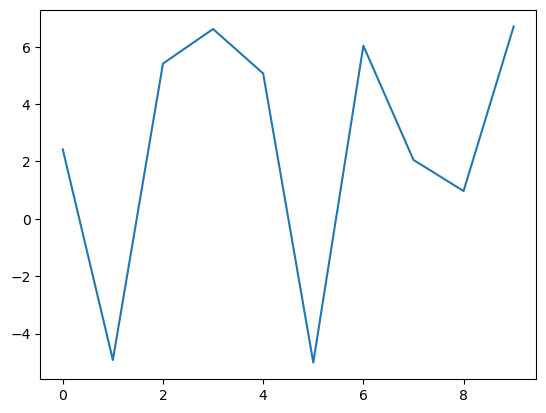

Nombre d'échantillons:  10


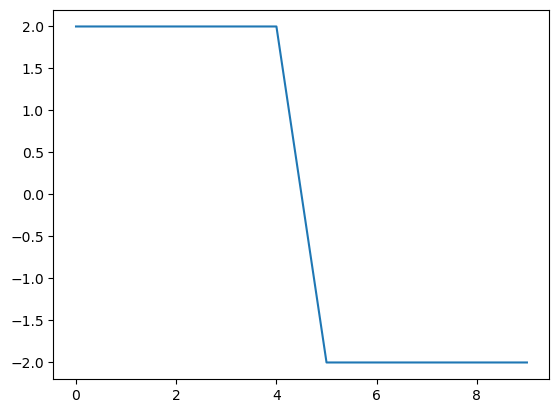

Nombre d'échantillons:  10


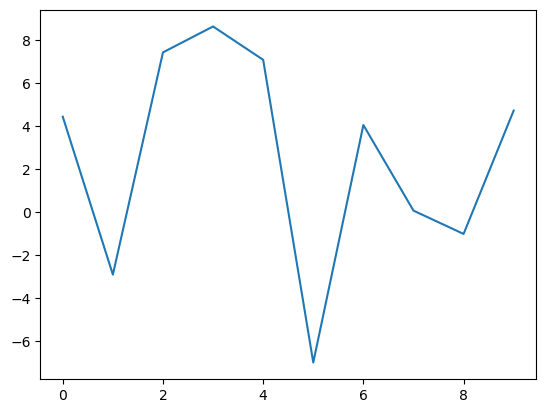

In [1]:
# Exercice 2

import numpy as np
import matplotlib.pyplot as plt
 
class Signal:  # creation de la classe mere 
    def __init__(self, nbr):
        self.nbr = nbr
        self.tab = np.zeros(nbr)

    def echantillons(self):
        return self.nbr

    def moyenne(self):
        return np.mean(self.tab)

    def correlation(self):
        return np.corrcoef(self.tab, self.tab)[0, 1]  #[0,1] renvoie au deuxieme coefficient de correlation de tab

    def display(self):
        print("Nombre d'échantillons: ",self.nbr)
        plt.plot(self.tab)
        plt.show()


class Aleatoire(Signal):
    def __init__(self, nbr, sigma, mean):
        super().__init__(nbr)
        self.sigma = sigma
        self.mean = mean
        self.init_alea()

    def init_alea(self):
        self.tab = np.random.randn(self.nbr) * self.sigma + self.mean
        # +self.mean : pour ne pas que le graphique soit centre a 0 suivant la distribution
        # gaussienne standard

    def correlation(self):
        print("Classe Aléatoire")
        return np.power(self.tab, 2) # 2 fait allusion a la puissance 2


class Deterministe(Signal):
    def __init__(self, nbr, amplitude):
        super().__init__(nbr)
        self.amplitude = amplitude
        self.valeurs()

    def valeurs(self):
        self.tab[:self.nbr // 2] =  self.amplitude
        self.tab[self.nbr // 2:] = -self.amplitude

def addition(ob1, ob2):
    k = Deterministe(ob1.nbr, 0)  # Initialisation d'un objet déterministe
    k.tab = ob1.tab + ob2.tab
    return k

# Programme principal

if __name__ == "__main__":
    # Création d'un objet Aléatoire
    aleatoire = Aleatoire(10, 5, 2)

    # Création d'un objet Déterministe
    deterministe = Deterministe(10, 2)

    # Appel des méthodes pour chaque classe
    print("Nombre d'échantillons de l'aleatoire: ",aleatoire.echantillons(), "la Moyenne est: ",aleatoire.moyenne(), "Corrélation: ",aleatoire.correlation())
    print("Nombre d'échantillons de déterministe: ",deterministe.echantillons(), "la Moyenne est:",deterministe.moyenne(), "Corrélation: ",deterministe.correlation())

    # Appel de la fonction Addition
    k = addition(aleatoire, deterministe)

    # affichage des objets
    aleatoire.display()
    deterministe.display()
    k.display()
